# Exploratory Data Analysis

## Data Acquisition

In [51]:
import pandas as pd
import numpy as np

# import warnings filter
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

df1 = pd.read_csv('D:\project\health analysis\Heart Disease Data\Heart disease.csv')

df1




,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Data Validation

In [371]:
df1.info()

# The independant and target variable are pre-encoded for model development.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [372]:
df1.shape

(303, 14)

## Missing Value Treatment

In [53]:
df1.isna().sum()
# No missing Value Found

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Data Imbalance Check

In [54]:
df2=df1.copy()
df2['target']=df2.target.map({0:'No Heart Disease',1:'Heart Disease'})
df2['target'].value_counts()

Heart Disease       165
No Heart Disease    138
Name: target, dtype: int64

In [ ]:
## Since the split in the target variable is 54% and 46% we can consider this to be fairly Balanced DataSet 

## Outlier Treatment

#### To check and remove outliers in *Numerical* Variables

In [373]:
df1['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

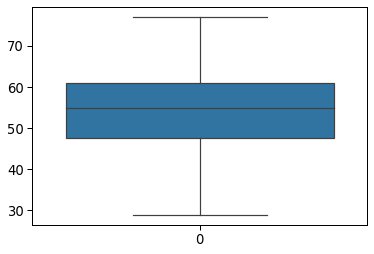

In [374]:
sns.boxplot(data=df1['age'])

## No Outlier in age column

In [379]:
df1['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

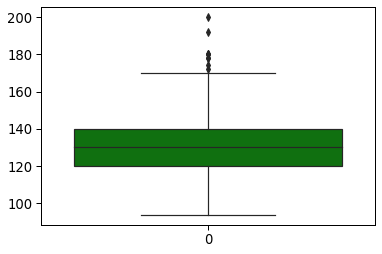

In [381]:
sns.boxplot(data=df1['trestbps'],color='green')

## Outliers present in trestbps i.e. RESTING BLOOD PRESSURE column

In [383]:
df1['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

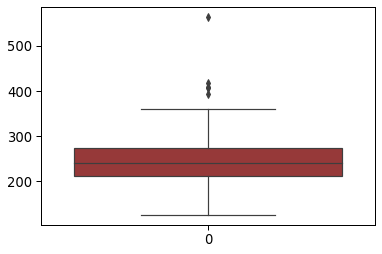

In [384]:
sns.boxplot(data=df1['chol'],color='brown')

## Outliers present in chol i.e. CHOLESTEROL LEVEL column

In [385]:
df1['thalach'].describe()

count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64

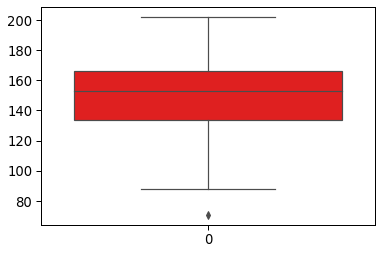

In [386]:
sns.boxplot(data=df1['thalach'],color='red')

## Outliers present in thalach i.e. MAX HEART RATE ACHIEVED column

In [389]:
df1['oldpeak'].describe()


count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

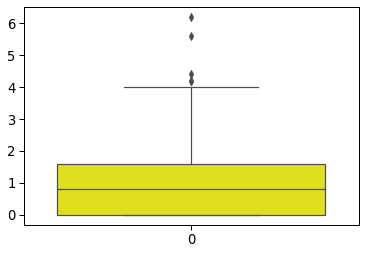

In [390]:
sns.boxplot(data=df1['oldpeak'],color='yellow')

## Outliers present in oldpeak i.e. ST depression induced by exercise relative to rest column

## From the box plots we can see there are Outliers in st_depression, max_heart_rate_achieved, resting_blood_sugar and cholesterol in these variables. So lets drop the outlier value and replace the outlier using IQR.

In [391]:
#creating copy of data
df3 = df1.copy()

In [392]:
#Function to remove Outliers
def remove_outlier(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    low_rang = Q1 - (1.5 * IQR)
    upp_rang = Q3 + (1.5 * IQR)
    return low_rang, upp_rang

In [396]:
low_chol, upp_chol = remove_outlier(df3['chol'])
low_chol
df3['chol'] = np.where(df3['chol']>upp_chol, upp_chol, df3['chol'])
df3['chol'] = np.where(df3['chol']<low_chol, low_chol, df3['chol'])

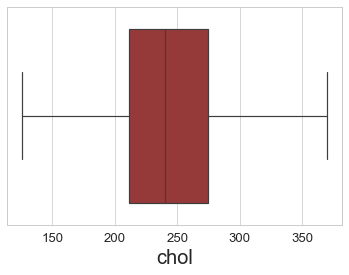

In [397]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'chol', data = df3,color='brown')

In [398]:
low_hrate, upp_hrate = remove_outlier(df3['thalach'])
df3['thalach'] = np.where(df3['thalach']>upp_hrate, upp_hrate, df3['thalach'])
df3['thalach'] = np.where(df3['thalach']<low_hrate, low_hrate, df3['thalach'])

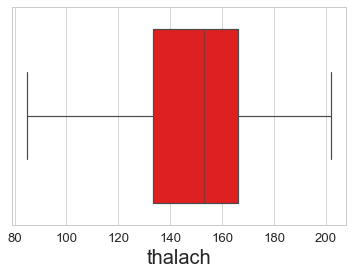

In [399]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'thalach', data = df3,color='red')

In [400]:
low_depr, upp_depr = remove_outlier(df3['oldpeak'])
df3['oldpeak'] = np.where(df3['oldpeak']>upp_depr, upp_depr, df3['oldpeak'])
df3['oldpeak'] = np.where(df3['oldpeak']<low_depr, low_depr, df3['oldpeak'])

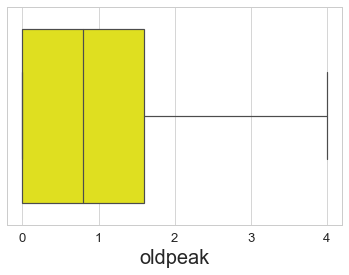

In [401]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'oldpeak', data = df3,color='yellow')

In [402]:
low_rbs, upp_rbs = remove_outlier(df3['trestbps'])
df3['trestbps'] = np.where(df3['trestbps']>upp_rbs, upp_rbs, df3['trestbps'])
df3['trestbps'] = np.where(df3['trestbps']<low_rbs, low_rbs, df3['trestbps'])

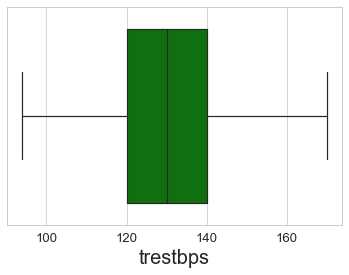

In [403]:
sns.set_style("whitegrid")
  
sns.boxplot(x = 'trestbps', data = df3,color='green')

## All the Outliers are removed

## Data Visualization

In [492]:
class visuals:
    def count(self,df):
        ax=sns.countplot(data = df, x = 'target')
        ax.set_title('Disease Frequency')
        for p in ax.patches:
            ax.annotate(f'\n{round((p.get_height()/(df.target.count()))*100,2)}%', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=15)
        plt.show() 
        
    def dist(self,df):
        sns.set_context("paper", font_scale = 1.5, rc = {"font.size": 30,"axes.titlesize": 25,"axes.labelsize": 20}) 
        g=sns.catplot(kind = 'count', data = df, x = 'age', hue = 'target', order = df['age'].sort_values().unique())
        g.fig.set_figwidth(35)
        g.fig.set_figheight(5)
        plt.title('Variation of Age for each target class')
        plt.title('Variation of Age for each target class')
        plt.show()
        
    def agevssex(self,df):
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=0, fontsize=18)
        sns.countplot(x=df['sex'],hue='target',data=df)
        plt.xlabel("0: FEMALE, 1: MALE",fontsize=18)
        plt.ylabel("count",fontsize=18)
        plt.title('Gender v/s target\n')
        plt.show()
        
    def chestpainvtarg(self,df):
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=0, fontsize=18)
        sns.countplot(x=df['cp'],hue='target',data=df)
        #plt.xlabel("chest_pain_type",fontsize=18)
        plt.xlabel("0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic \n ChestPain Type")
        plt.ylabel("count",fontsize=18)
        plt.title('Chest pain details against target\n')
        plt.show()
        
    def bpsvtar(self,df):
        plt.figure(figsize=(8,6))
        sns.histplot(data=df,hue='target',x="trestbps",multiple="dodge")
        plt.show()
        df['bins'] = pd.cut(df['trestbps'],bins=[0,100,120,140,160,180], labels=["0-100","101-120","121-140","141-160","160+"])
        plt.figure(figsize=(8,8))
        df[df['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","white"],startangle=90,fontsize=15)
        plt.show()
        plt.figure(figsize=(15,6))
        sns.countplot(data=df,hue='target',x='fbs')
        plt.xlabel("fasting_blood_sugar>120mgdl: 1, fasting_blood_sugar<120mg<dl: 0",fontsize=18)
        plt.ylabel("count",fontsize=18)
        plt.title('Fasting Blood Sugar v/s target\n')
        plt.show()
        
    def agevstar(self,df):
        plt.figure(figsize=(8,6))
        sns.histplot(data=df,hue='target',x="age",multiple="dodge")
        plt.title('Age v/s target\n')
        plt.show()
        df['bins'] = pd.cut(df['age'],bins=[0,30,40,50,60,70,80], labels=["0-30","31-40","41-50","51-60","61-65","65+"])
        plt.figure(figsize=(8,8))
        df[df['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","purple"],startangle=90,fontsize=15)
        plt.show()
        
    def cholvtar(self,df):
        plt.figure(figsize=(8,6))
        sns.histplot(data=df,hue='target',x="chol",multiple="dodge")
        plt.show()
        df['bins'] = pd.cut(df['chol'],bins=[0,150,200,250,300,350,400], labels=["0-150","151-200","201-250","251-300","301-350","350+"])
        plt.figure(figsize=(8,8))
        df[df['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)
        plt.title(label="Cholestrol details against target\n",loc="left",fontstyle='italic')
        plt.show()
        
    def ecgvtar(self,df):
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=0, fontsize=18)
        sns.countplot(x='restecg',hue='target',data=df)
        plt.xlabel("rest_ecg, 0:normal 1:symmetric T wave 2: left vertricular hypertrophy",fontsize=18)
        plt.ylabel("count",fontsize=18)
        plt.title('Relation of ECG measurement with target\n')
        plt.show()
        
    def hrtrtvtar(self,df):
        plt.figure(figsize=(8,6))
        sns.histplot(x='thalach',hue='target',multiple='dodge',data=df)
        plt.show()
        df['bins'] = pd.cut(df['thalach'],bins=[80,100,120,140,160,180,200,300], labels=["80-100","101-120","121-140","141-160","161-180","181-200","201+"])
        plt.figure(figsize=(8,8))
        df[df['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple","orange"],startangle=90,fontsize=10)
    
    def exervtar(self,df):
        plt.figure(figsize=(8,6))
        plt.xticks(rotation=0, fontsize=18)
        sns.countplot(x='exang',data=df, hue='target')
        plt.xlabel("exercise_induced_angina",fontsize=18)
        plt.ylabel("count",fontsize=18)
        plt.title("Exercise induced angina,occur due to exercise or heavy workout v/s target\n")
        plt.show()
    
    def st_depvtar(self,df):
        plt.figure(figsize=(8,6))
        sns.histplot(x='oldpeak',hue='target',multiple='dodge',data=df)
        plt.show()
        df['bins'] = pd.cut(df['oldpeak'],bins=[0.0,1.0,2.0,3.0,4.0,5.0], labels=["0.0-1.0","1.1-2.0","2.1-3.0","3.1-4.0","4.1-5.0"])
        plt.figure(figsize=(8,8))
        df[df['target']==1]['bins'].value_counts().plot.pie(autopct="%.2f", colors=["red","green","blue","yellow","pink","purple"],startangle=90,fontsize=10)
        plt.title(label="ST depression details against target\n",loc="left",fontstyle='italic')
        plt.show()
        
    def heat(self,df):
        plt.figure(figsize=(18,18))
        sns. set(font_scale=1.4)
        sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')
    
        

In [493]:
v=visuals()

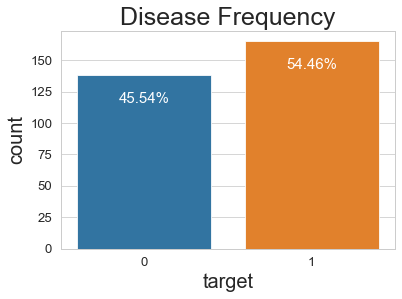

In [430]:
v.count(df3)

In [ ]:
## 54.46% Of the patients detected with heart disease.

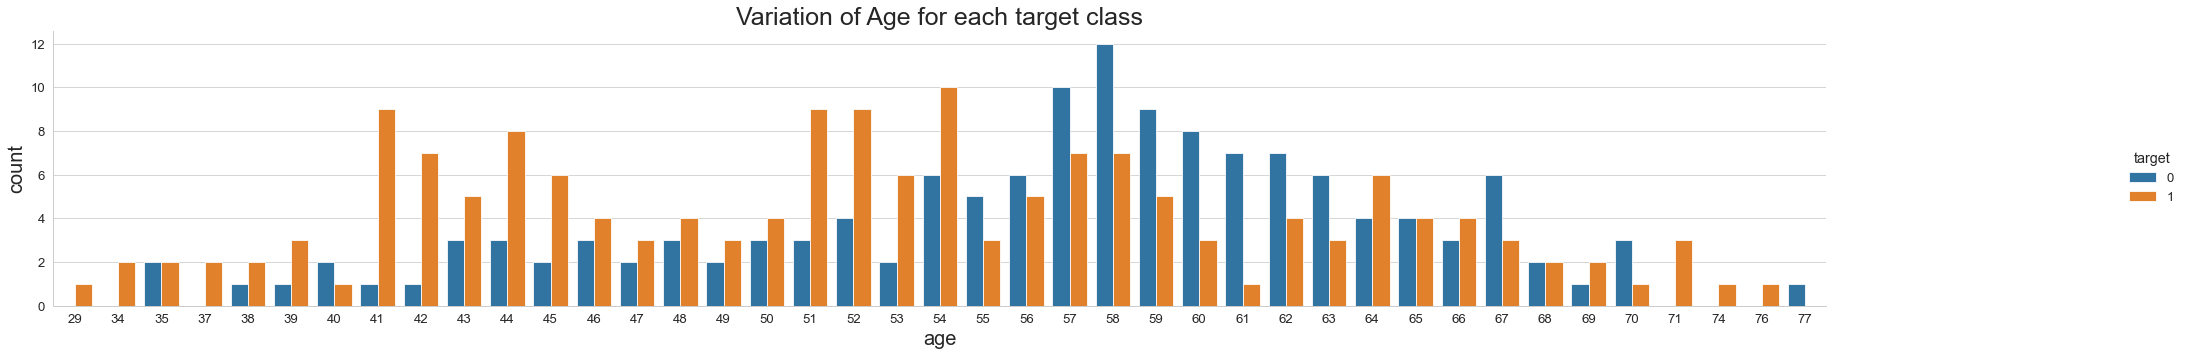

In [431]:
v.dist(df3)

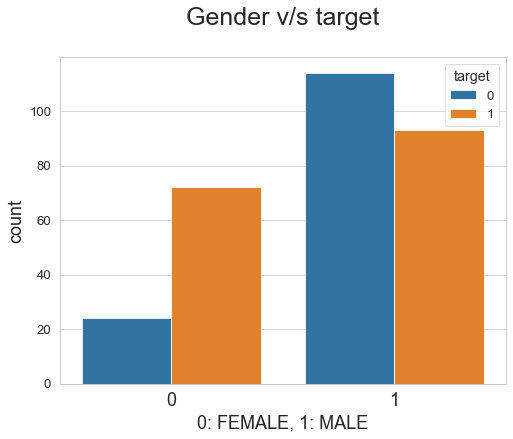

In [432]:
v.agevssex(df3)

## Females have higher chances of having heart disease than females.

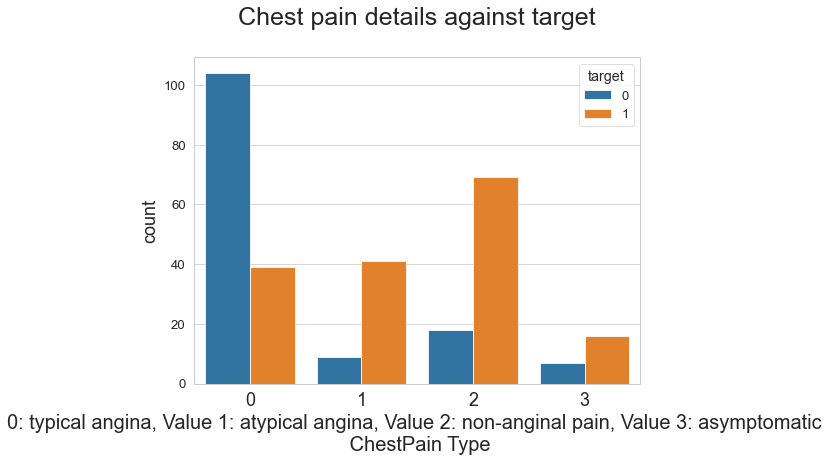

In [441]:
v.chestpainvtarg(df3)

## Patients suffering from NON-ANGINAL CHEST PAIN are more susceptible to have heart disease.

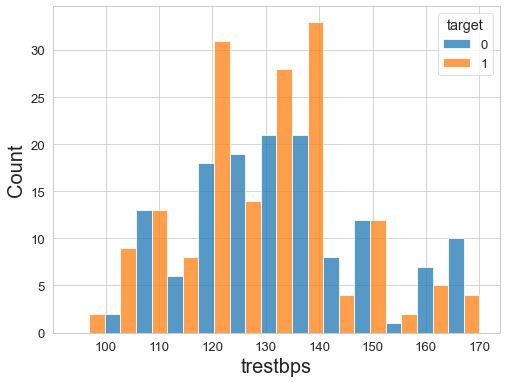

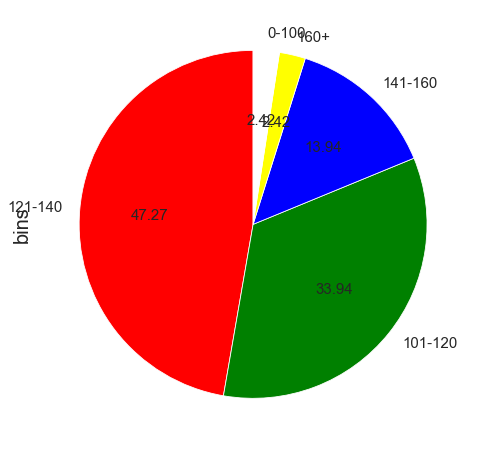

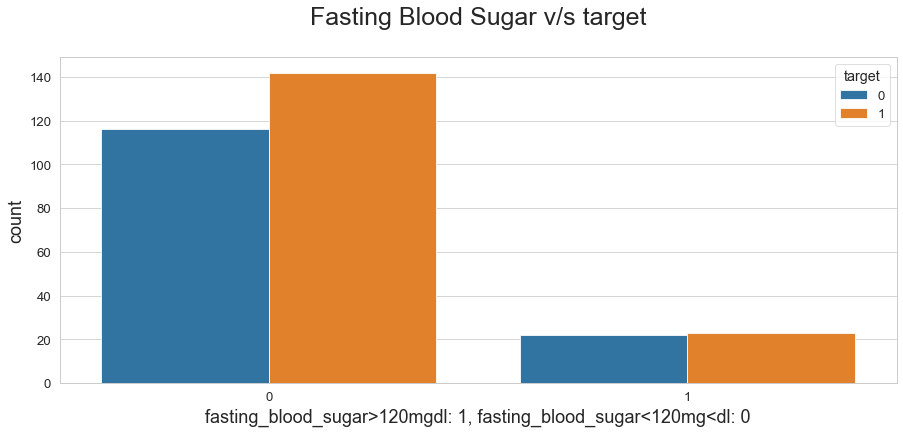

In [467]:
v.bpsvtar(df3)

## Patients having fasting blood suger <120 mg/dl have higher chances of having heart disease.

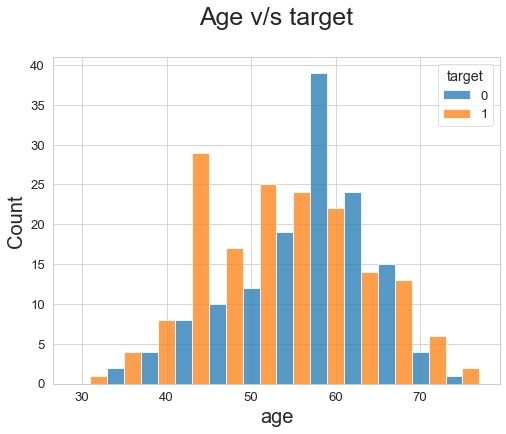

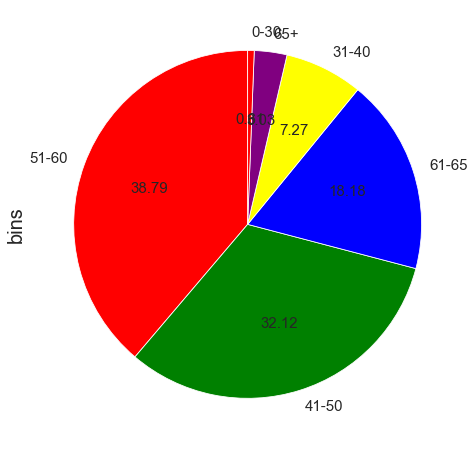

In [477]:
v.agevstar(df3)

## Peolpe between age 55-65 have higher chances of having heart disease.

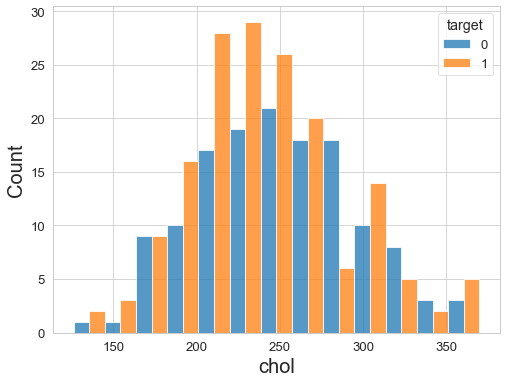

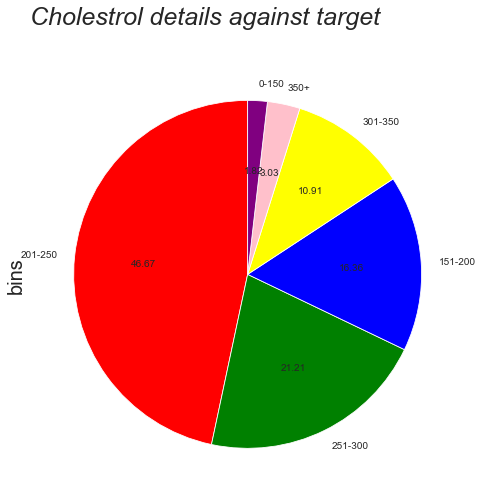

In [478]:
v.cholvtar(df3)

## Patients having cholesterol level between 200 to 300 mg/dl have higher chances of having heart disease.

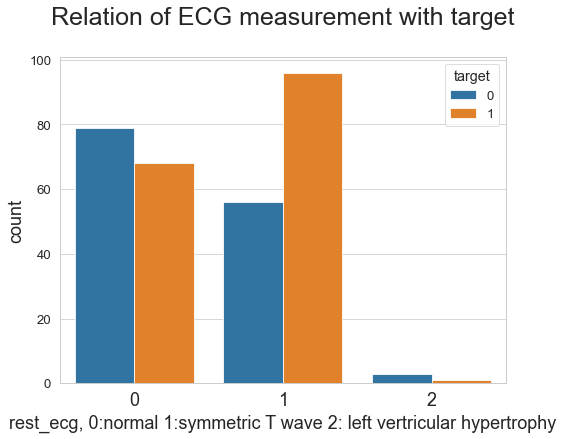

In [479]:
v.ecgvtar(df3)

## The above plot shows that the more number of patients showing symmetric T wave are more likelihood of suffering from a heart disease.

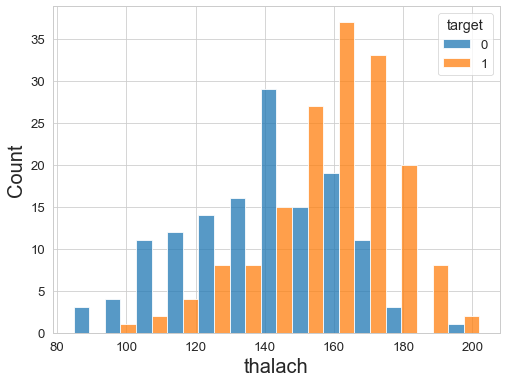

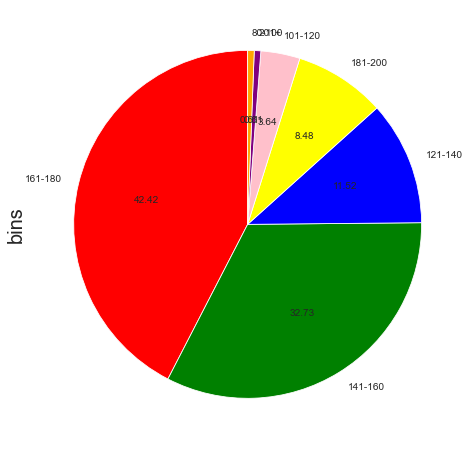

In [480]:
v.hrtrtvtar(df3)

## People having heart rate between 160 to 180 are likely to suffer from heart disease.

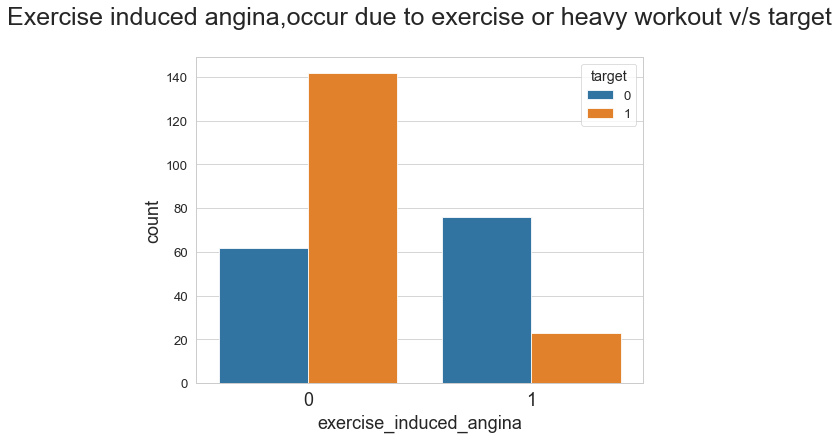

In [481]:
v.exervtar(df3)

In [ ]:
## Excercise induced angina has slightly lower chance of causing heart disease.

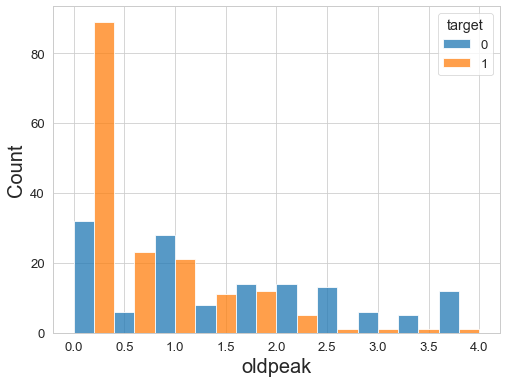

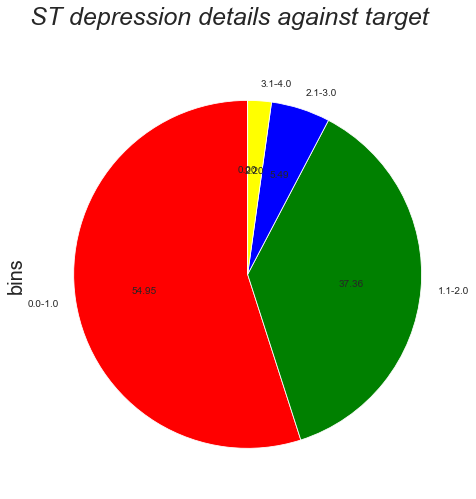

In [482]:
v.st_depvtar(df3)

## People having st depression induced by exercise relative to rest <1.0 mm have higher chances of heart disease.

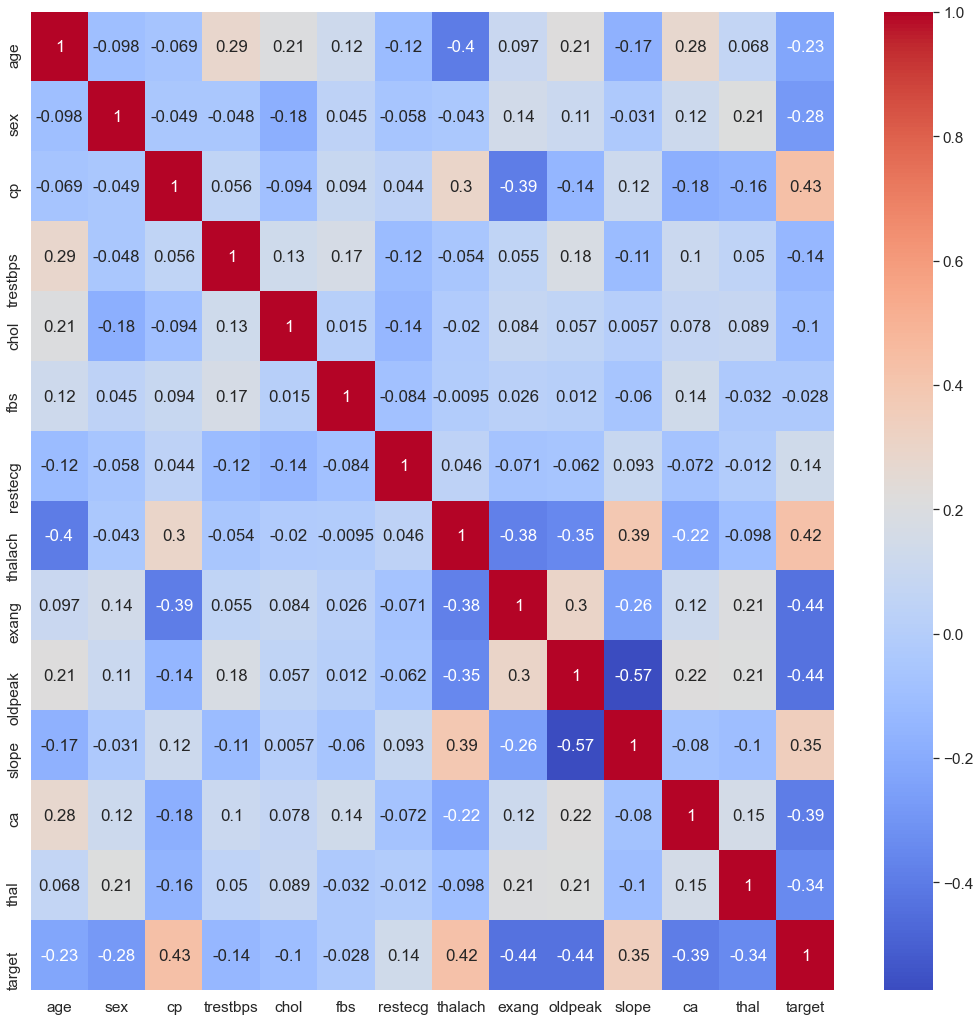

In [494]:
v.heat(df3)

# Conclusions from EDA

### trestbps : resting blood sugar (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
### cholesterol - serum cholestoral in mg/dl : above 200 is cause for concern.
### thalach - maximum heart rate achieved : People who acheived a maximum more than 140 are more likely to have heart disease.
### oldpeak - ST depression induced by exercise relative to rest looks at stress of heart, during excercise unhealthy heart - Downsloping - will stress more.


## 1. From target value we can say that our dataset is amost balanced with 54% of patients having heart disease and 46 % of patients not having heart disease.
## 2) Females have higher chances of having heart disease than females.
## 3) Patients with age >55 years and having resting blood suger( i.e in diastolic state) in range 121-140 mm Hg have higher chances of heart disease. patients with age group 40 to 45 have little chances and age below 40 has negligiable cgances of having a heart disease.
## 4) Patients suffering from heart disease are mostly in age group of 55-65 years.
## 5) Higher cholesterol means higher chances of heart disease. it plays an important role in determining heart problems. With age cholesterol increases and level 200- 350 mg/dl are of concern.
## 6) Patients showing symmetric T wave in Resting electrocardiographic measurement are more likely to suffer from a heart disease.
## 7) Patients who are likely to suffer from heart disease have higher maximum heart rates( rate between 140-160) whereas patients who are not likely to suffer from heart disease are having lower maximum heart rates.
## 8) Exercise induced anginal pain slightly lower chances of getting heart disease than without exercise induced pain.


## Data Modelling

In [363]:
class models:
    def logistic(self,df):
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

        from sklearn.linear_model import LogisticRegression
        classifier = LogisticRegression(solver='lbfgs', max_iter=1000)
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = classifier.predict(X_test)

        from sklearn.metrics import confusion_matrix
        cm_test = confusion_matrix(y_pred, y_test)

        y_pred_train = classifier.predict(X_train)
        cm_train = confusion_matrix(y_pred_train, y_train)

        print()
        print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
        print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
        from sklearn.metrics import precision_score
        precision = precision_score(y_pred, y_test)
        print('Precison score is',precision)
        
        y_full=classifier.predict(X)
        y_pred_proba=classifier.predict_proba(X)
        predit_probab=pd.DataFrame(y_pred_proba[y_pred_proba>0.5],columns=["Predict Proba"])
        df_pred=pd.DataFrame(data=y_full,columns=["Prediction"])

        df_final=pd.concat([df1,df_pred],axis=1)
        df_final=pd.concat([df_final,predit_probab],axis=1)
        df_final.to_csv("heart_disease_predicted_logistic.csv")
        
    def decision_tree(self,df):
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        from sklearn.tree import DecisionTreeClassifier
        classifier = DecisionTreeClassifier()
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = classifier.predict(X_test)

        from sklearn.metrics import confusion_matrix
        cm_test = confusion_matrix(y_pred, y_test)

        y_pred_train = classifier.predict(X_train)
        cm_train = confusion_matrix(y_pred_train, y_train)

        print()
        print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
        print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
        from sklearn.metrics import precision_score
        precision = precision_score(y_pred, y_test)
        print('Precison score is',precision)
        
        y_full=classifier.predict(X)
        y_pred_proba=classifier.predict_proba(X)
        predit_probab=pd.DataFrame(y_pred_proba[y_pred_proba>0.5],columns=["Predict Proba"])
        df_pred=pd.DataFrame(data=y_full,columns=["Prediction"])

        df_final=pd.concat([df1,df_pred],axis=1)
        df_final=pd.concat([df_final,predit_probab],axis=1)
        df_final.to_csv("heart_disease_predicted_decision_tree.csv")
        
        
    def random_forest(self,df):
        
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 0)

        from sklearn.ensemble import RandomForestClassifier
        classifier = RandomForestClassifier(n_estimators = 10)
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = classifier.predict(X_test)

        from sklearn.metrics import confusion_matrix
        cm_test = confusion_matrix(y_pred, y_test)

        y_pred_train = classifier.predict(X_train)
        cm_train = confusion_matrix(y_pred_train, y_train)

        print()
        print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
        print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
        from sklearn.metrics import precision_score
        precision = precision_score(y_pred, y_test)
        print('Precison score is',precision)
        
        y_full=classifier.predict(X)
        y_pred_proba=classifier.predict_proba(X)
        predit_probab=pd.DataFrame(y_pred_proba[y_pred_proba>0.5],columns=["Predict Proba"])
        df_pred=pd.DataFrame(data=y_full,columns=["Prediction"])

        df_final=pd.concat([df1,df_pred],axis=1)
        df_final=pd.concat([df_final,predit_probab],axis=1)
        df_final.to_csv("heart_disease_predicted_random_forest.csv")
        
    def svm(self,df):
        
        X = df.iloc[:, :-1].values
        y = df.iloc[:, -1].values

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        from sklearn.svm import SVC
        classifier = SVC(kernel = 'rbf',probability=True)
        classifier.fit(X_train, y_train)

        # Predicting the Test set results
        y_pred = classifier.predict(X_test)

        from sklearn.metrics import confusion_matrix
        cm_test = confusion_matrix(y_pred, y_test)
    
        y_pred_train = classifier.predict(X_train)
        cm_train = confusion_matrix(y_pred_train, y_train)
    
        print()
        print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
        print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
        from sklearn.metrics import precision_score
        precision = precision_score(y_pred, y_test)
        print('Precison score is',precision)
        
        y_full=classifier.predict(X)
        y_pred_proba=classifier.predict_proba(X)
        predit_probab=pd.DataFrame(y_pred_proba[y_pred_proba>0.5],columns=["Predict Proba"])
        df_pred=pd.DataFrame(data=y_full,columns=["Prediction"])

        df_final=pd.concat([df1,df_pred],axis=1)
        df_final=pd.concat([df_final,predit_probab],axis=1)
        df_final.to_csv("heart_disease_predicted_svm.csv")
        
        
        
    def naive_bayes(self,df):
        X = df1.iloc[:, :-1].values
        y = df1.iloc[:, -1].values

        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

        from sklearn.naive_bayes import GaussianNB
        classifier = GaussianNB()
        classifier.fit(X_train, y_train)


        # Predicting the Test set results
        y_pred = classifier.predict(X_test)

        from sklearn.metrics import confusion_matrix
        cm_test = confusion_matrix(y_pred, y_test)

        y_pred_train = classifier.predict(X_train)
        cm_train = confusion_matrix(y_pred_train, y_train)

        print()
        print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
        print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
        from sklearn.metrics import precision_score
        precision = precision_score(y_pred, y_test)
        print('Precison score is',precision)
        
        y_full=classifier.predict(X)
        y_pred_proba=classifier.predict_proba(X)
        predit_probab=pd.DataFrame(y_pred_proba[y_pred_proba>0.5],columns=["Predict Proba"])
        df_pred=pd.DataFrame(data=y_full,columns=["Prediction"])

        df_final=pd.concat([df1,df_pred],axis=1)
        df_final=pd.concat([df_final,predit_probab],axis=1)
        df_final.to_csv("heart_disease_predicted_naive.csv")
        
        
        


In [364]:
m=models()

In [408]:
m.logistic(df3)


Accuracy for training set for Logistic Regression = 0.8584905660377359
Accuracy for test set for Logistic Regression = 0.8241758241758241
Precison score is 0.9148936170212766


In [409]:
m.decision_tree(df3)


Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7540983606557377
Precison score is 0.7352941176470589


In [410]:
m.random_forest(df3)


Accuracy for training set for Random Forest = 0.9948979591836735
Accuracy for test set for Random Forest = 0.8130841121495327
Precison score is 0.8518518518518519


In [411]:
m.svm(df3)


Accuracy for training set for svm = 0.6735537190082644
Accuracy for test set for svm = 0.7049180327868853
Precison score is 0.8529411764705882


In [412]:
m.naive_bayes(df3)


Accuracy for training set for Naive Bayes = 0.8347107438016529
Accuracy for test set for Naive Bayes = 0.8524590163934426
Precison score is 0.9117647058823529
